In [3]:
%run helper_functions.ipynb

In [6]:
df = pd.read_csv("../data/train_CLEAN.csv")

In [7]:
features = ['age', 'education-num', 'capital-gain',
       'capital-loss', 'hours-per-week', 'is_usa',
       'is_top7_occ','is_married', 'is_male',
       'is_high_ed']

target = 'wage'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

## Baseline Model

In [8]:
y_train.value_counts(normalize=True)

0    0.759173
1    0.240827
Name: wage, dtype: float64

In [9]:
gsc = GridSearchContainer(X,y)

In [10]:
# Logistic Regression
lr = LogisticRegression()


# K-Nearest Neighbors
knn = Pipeline([('ss', StandardScaler()),
                ('knn', KNeighborsClassifier())
               ])

# Decision Tree
dt = DecisionTreeClassifier()

# Bagged Trees
bag = BaggingClassifier()

# Random Forest
rf = RandomForestClassifier()

# SupportVector
svc = Pipeline([('ss', StandardScaler()),
                ('svc', SVC())
               ])

In [11]:
# get_accuracy(lr, "Logistic Regression", X_train, X_test, y_train, y_test)
# get_accuracy(knn, "KNeighbors", X_train, X_test, y_train, y_test)
# get_accuracy(dt, "Decision Tree", X_train, X_test, y_train, y_test)
# get_accuracy(bag, "Bagged Trees", X_train, X_test, y_train, y_test)
get_accuracy(rf, "Random Forest", X_train, X_test, y_train, y_test)
# get_accuracy(ada, "Ada Boost", X_train, X_test, y_train, y_test)
# get_accuracy(svc, "Support Vector", X_train, X_test, y_train, y_test)

Random Forest:
Train: 0.9362407862407862
Test: 0.8443680137575237



In [12]:
params_lr = {
    'C' : [0.1, 1.0, 10],
    'fit_intercept' : [True, False],
    'intercept_scaling' : [1],
    'class_weight' : [None, 'balanced'],
    'random_state' : [42],
    'solver' : ['liblinear']
}

params_dt = {
    'max_depth' : [None],
#    'min_samples_split' : [0.1, 0.5, 1.0],
    'min_samples_leaf' : [1, 2, 3],
    'ccp_alpha' : np.linspace(0,5,50)
}

params_rf = {
    'n_estimators' : [100],
    'max_depth' : [None],
#    'min_samples_split' : [1, 2, 3],
    'min_samples_leaf' : [1, 2, 3],
    'ccp_alpha' : [0.0, 5, 50, 500]
}

params_bag = {
    'n_estimators' : [5, 10, 100]
}

params_knn = {
    'knn__n_neighbors' : [1, 3, 5, 11, 21],
    'knn__weights' : ['uniform', 'distance'],
    'knn__leaf_size' : [30],
    'knn__p' : [1, 2]
}


params_svc = {
    'svc__C' : [0.1, 1, 10],
    'svc__kernel' : ['linear', 'rbf']
}

In [13]:
gsc.search(lr, params_lr, mod_name="logreg")
gsc.model_df.head()

Train accuracy: 0.8442669942669943
Test accuracy: 0.8476845596364083


,C,class_weight,fit_intercept,intercept_scaling,random_state,solver,accuracy
logreg_0,0.1,None,True,1,42,liblinear,0.843898


In [57]:
gsc.search(dt, params_dt, mod_name="decision_tree")
gsc.model_df.head()

Train accuracy: 0.8998771498771498
Test accuracy: 0.8408057978135364


,C,class_weight,fit_intercept,intercept_scaling,random_state,solver,accuracy,ccp_alpha,max_depth,min_samples_leaf,min_samples_split,n_estimators
decision_tree_1,NaN,NaN,NaN,NaN,NaN,NaN,0.849918,0.0,NaN,1.0,0.1,NaN
logreg_0,10.0,NaN,True,1.0,42.0,liblinear,0.843735,NaN,NaN,NaN,NaN,NaN
decision_tree_3,NaN,NaN,NaN,NaN,NaN,NaN,0.837633,0.0,NaN,3.0,NaN,NaN
random_forest_2,NaN,NaN,NaN,NaN,NaN,NaN,0.759173,5.0,NaN,1.0,0.1,1.0


In [71]:
gsc.search(rf, params_rf, mod_name="random_forest")
gsc.model_df.head()

Train accuracy: 0.8884520884520885
Test accuracy: 0.8642672890308316


,C,class_weight,fit_intercept,intercept_scaling,random_state,solver,accuracy,ccp_alpha,max_depth,min_samples_leaf,min_samples_split,n_estimators,knn__leaf_size,knn__n_neighbors,knn__p,knn__weights,svc__C,svc__kernel
random_forest_7,NaN,NaN,NaN,NaN,NaN,NaN,0.856962,0.0,NaN,3.0,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN
decision_tree_1,NaN,NaN,NaN,NaN,NaN,NaN,0.849918,0.0,NaN,1.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SVC_6,NaN,NaN,NaN,NaN,NaN,NaN,0.847461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,rbf
logreg_0,10.0,NaN,True,1.0,42.0,liblinear,0.843735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
knn_5,NaN,NaN,NaN,NaN,NaN,NaN,0.842506,NaN,NaN,NaN,NaN,NaN,30.0,21.0,1.0,uniform,NaN,NaN


In [64]:
gsc.search(bag, params_bag, mod_name="bagged_trees")
gsc.model_df.head()

Train accuracy: 0.9362407862407862
Test accuracy: 0.8406829627809851


,C,class_weight,fit_intercept,intercept_scaling,random_state,solver,accuracy,ccp_alpha,max_depth,min_samples_leaf,min_samples_split,n_estimators
decision_tree_1,NaN,NaN,NaN,NaN,NaN,NaN,0.849918,0.0,NaN,1.0,0.1,NaN
logreg_0,10.0,NaN,True,1.0,42.0,liblinear,0.843735,NaN,NaN,NaN,NaN,NaN
bagged_trees_4,NaN,NaN,NaN,NaN,NaN,NaN,0.837797,NaN,NaN,NaN,NaN,100.0
decision_tree_3,NaN,NaN,NaN,NaN,NaN,NaN,0.837633,0.0,NaN,3.0,NaN,NaN
random_forest_2,NaN,NaN,NaN,NaN,NaN,NaN,0.759173,5.0,NaN,1.0,0.1,1.0


In [66]:
gsc.search(knn, params_knn, mod_name="knn")
gsc.model_df.head()

Train accuracy: 0.8550778050778051
Test accuracy: 0.8474388895713058


,C,class_weight,fit_intercept,intercept_scaling,random_state,solver,accuracy,ccp_alpha,max_depth,min_samples_leaf,min_samples_split,n_estimators,knn__leaf_size,knn__n_neighbors,knn__p,knn__weights
decision_tree_1,NaN,NaN,NaN,NaN,NaN,NaN,0.849918,0.0,NaN,1.0,0.1,NaN,NaN,NaN,NaN,NaN
logreg_0,10.0,NaN,True,1.0,42.0,liblinear,0.843735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
knn_5,NaN,NaN,NaN,NaN,NaN,NaN,0.842506,NaN,NaN,NaN,NaN,NaN,30.0,21.0,1.0,uniform
bagged_trees_4,NaN,NaN,NaN,NaN,NaN,NaN,0.837797,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN
decision_tree_3,NaN,NaN,NaN,NaN,NaN,NaN,0.837633,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
gsc.search(svc, params_svc, mod_name="SVC")
gsc.model_df.head()

Train accuracy: 0.8507780507780508
Test accuracy: 0.8527207959710109


,C,class_weight,fit_intercept,intercept_scaling,random_state,solver,accuracy,ccp_alpha,max_depth,min_samples_leaf,min_samples_split,n_estimators,knn__leaf_size,knn__n_neighbors,knn__p,knn__weights,svc__C,svc__kernel
decision_tree_1,NaN,NaN,NaN,NaN,NaN,NaN,0.849918,0.0,NaN,1.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SVC_6,NaN,NaN,NaN,NaN,NaN,NaN,0.847461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,rbf
logreg_0,10.0,NaN,True,1.0,42.0,liblinear,0.843735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
knn_5,NaN,NaN,NaN,NaN,NaN,NaN,0.842506,NaN,NaN,NaN,NaN,NaN,30.0,21.0,1.0,uniform,NaN,NaN
bagged_trees_4,NaN,NaN,NaN,NaN,NaN,NaN,0.837797,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
best_models = gsc.best_models
models = [mod[0] for mod in best_models]
scores = [mod[1] for mod in best_models]
#plt.figure(figsize=(16,9))
#["Logistic Regression", "Decision Tree", "Random Forest", "Deci"]
best_model = best_models[-1][0]
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
best_models

[(LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                     warm_start=False),
  0.8437346437346438),
 (DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=0.1,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'),
  0.8499180999181),
 (RandomForestClassifier(bootstrap=True, ccp_alpha=5, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                        

In [90]:
df = pd.read_csv("data/large_train_sample.csv")

In [91]:
df['wage'] = df['wage'].apply(lambda a: int(a==' >50K'))

df['is_usa'] = df['native-country'].apply(lambda a: int(a==' United-States'))

df["is_top7_occ"] = df["occupation"].apply(lambda a: int(a==' Exec-managerial'
                                                       or a==' Prof-specialty'
                                                       or a==' Protective-serv'
                                                       or a==' Tech-support'
                                                       or a==' Sales'
                                                       or a==' Craft-repair'
                                                       or a==' Transport-moving'))

df["is_high_ed"] = df["education"].apply(lambda a: int(a==' Doctorate'
                                                       or a==' Prof-school'
                                                       or a==' Bachelors'
                                                       or a==' Masters'))

df["is_married"] = df["marital-status"].apply(lambda a: int(a==' Married-civ-spouse' or a==' Married-AF-spouse'))

df["is_male"] = df["sex"].apply(lambda a: int(a==' Male'))

In [92]:
features = ['age', 'education-num', 'capital-gain',
       'capital-loss', 'hours-per-week', 'is_usa',
       'is_top7_occ','is_married', 'is_male',
       'is_high_ed']

X = df[features]
y = df['wage']

#best_model.fit(X)

preds = best_model.predict(X)

final_df = pd.DataFrame({"wage_predictions": preds})

In [83]:
final_df.head()

,wage_predictions
0,0
1,0
2,0
3,1
4,0


In [84]:
final_df.to_csv("data/test_predictions.csv",index=False)

In [ ]:
preds = best_model.predict(X)

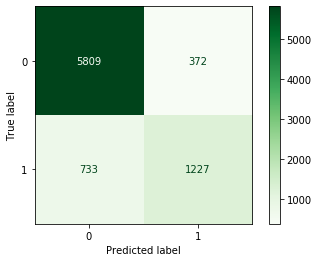

In [97]:
plot_confusion_matrix(best_model, X_test, y_test, cmap='Greens', values_format='d');
plt.savefig("confusion_matrix.png", transparent = True, facecolor="black")